In [1]:
from init import *
from repro import readfile

autotime loaded.


In [2]:
nlev = 60
fname = '/home/pankaj/phd/code/ model/model/reprobus/try1/MODEL_history_2019050112_001410'
pj1, uj1, vj1, alt, tj1, qj1, hc = readfile(fname, nlev, 44, 14)

time: 286 ms


In [3]:
levs = np.arange(nlev)[::-1]
lats = xr.DataArray(np.arange(90, -91, -2), dims='Latitude', attrs={'long_name':'Latitude'})
lons = xr.DataArray(np.arange(0, 360, 2), dims='Longitude', attrs={'long_name':'Longitude'})
# lons[lons>180] -= 360

pj1 = xr.DataArray(pj1, dims=['Longitude', 'Latitude'], coords=[lons, lats], \
                   attrs={'long_name':'Pressure [hPa]'})

uj1 = xr.DataArray(uj1, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'uwind [m/s]'})

vj1 = xr.DataArray(vj1, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'vwind [m/s]'})

tj1 = xr.DataArray(tj1, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'Temperature [K]'})

oz = xr.DataArray(hc[:, :, :, 4]/1e-6, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'Ozone [ppmv]'})

clo = xr.DataArray(hc[:, :, :, 10]/1e-9, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'ClO [ppbv]'})

hno3g = xr.DataArray(qj1[:, :, :, 42]/1e-9, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'HNO$_3$ [ppbv]'})

hno3 = xr.DataArray(qj1[:, :, :, 3]/1e-9, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'HNO$_3$ [ppbv]'})

n2o = xr.DataArray(qj1[:, :, :, 0]/1e-9, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'N$_2$O [ppbv]'})

alt = xr.DataArray(alt, dims=['Longitude', 'Latitude', 'Level'], coords=[lons, lats, levs], \
                   attrs={'long_name':'Altitude [km]'})


time: 273 ms


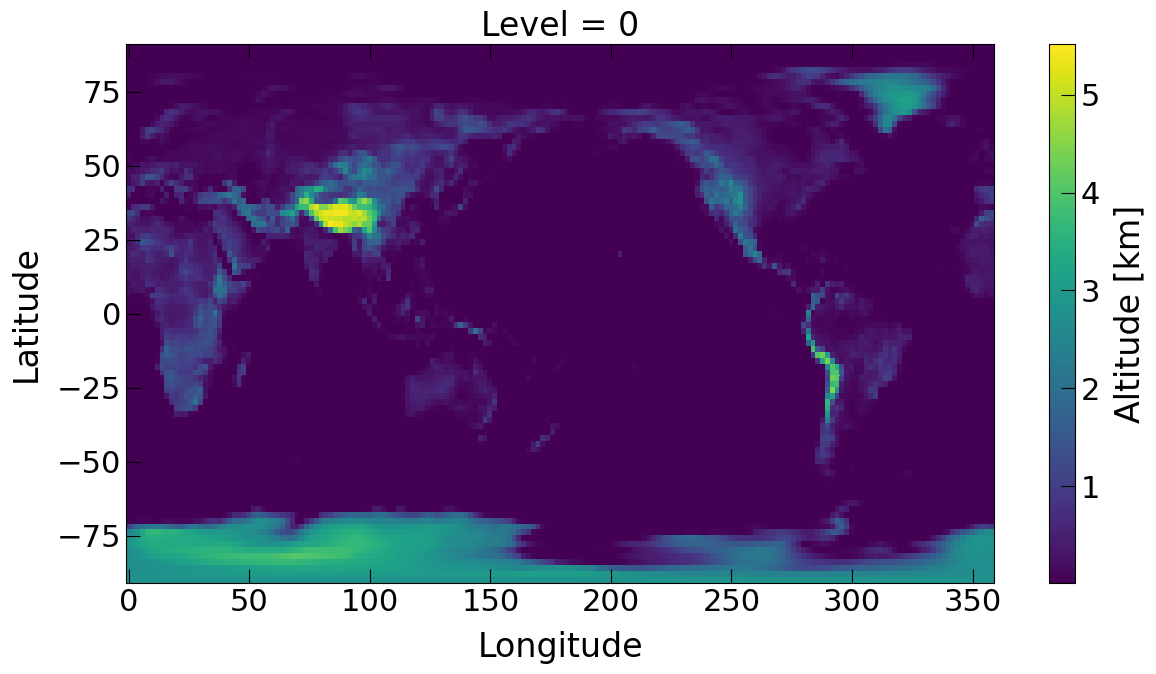

time: 320 ms


In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
alt[:, :, -1].T.plot(ax=ax)
plt.show()